In [1]:
import pandas as pd
import numpy as np
import os
# import seaborn as sns
# import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("adult.csv")

In [3]:
# Desktop/adult.csv

In [4]:
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.shape

(48842, 15)

In [6]:

df = df.drop_duplicates()

In [7]:
df.shape

(48790, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [9]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


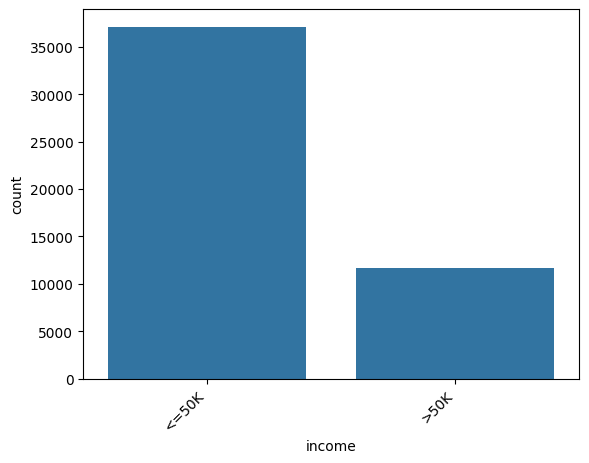

In [43]:
#visualize important features

!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="income", data=df)
plt.xticks(rotation=45, ha='right')

plt.show()

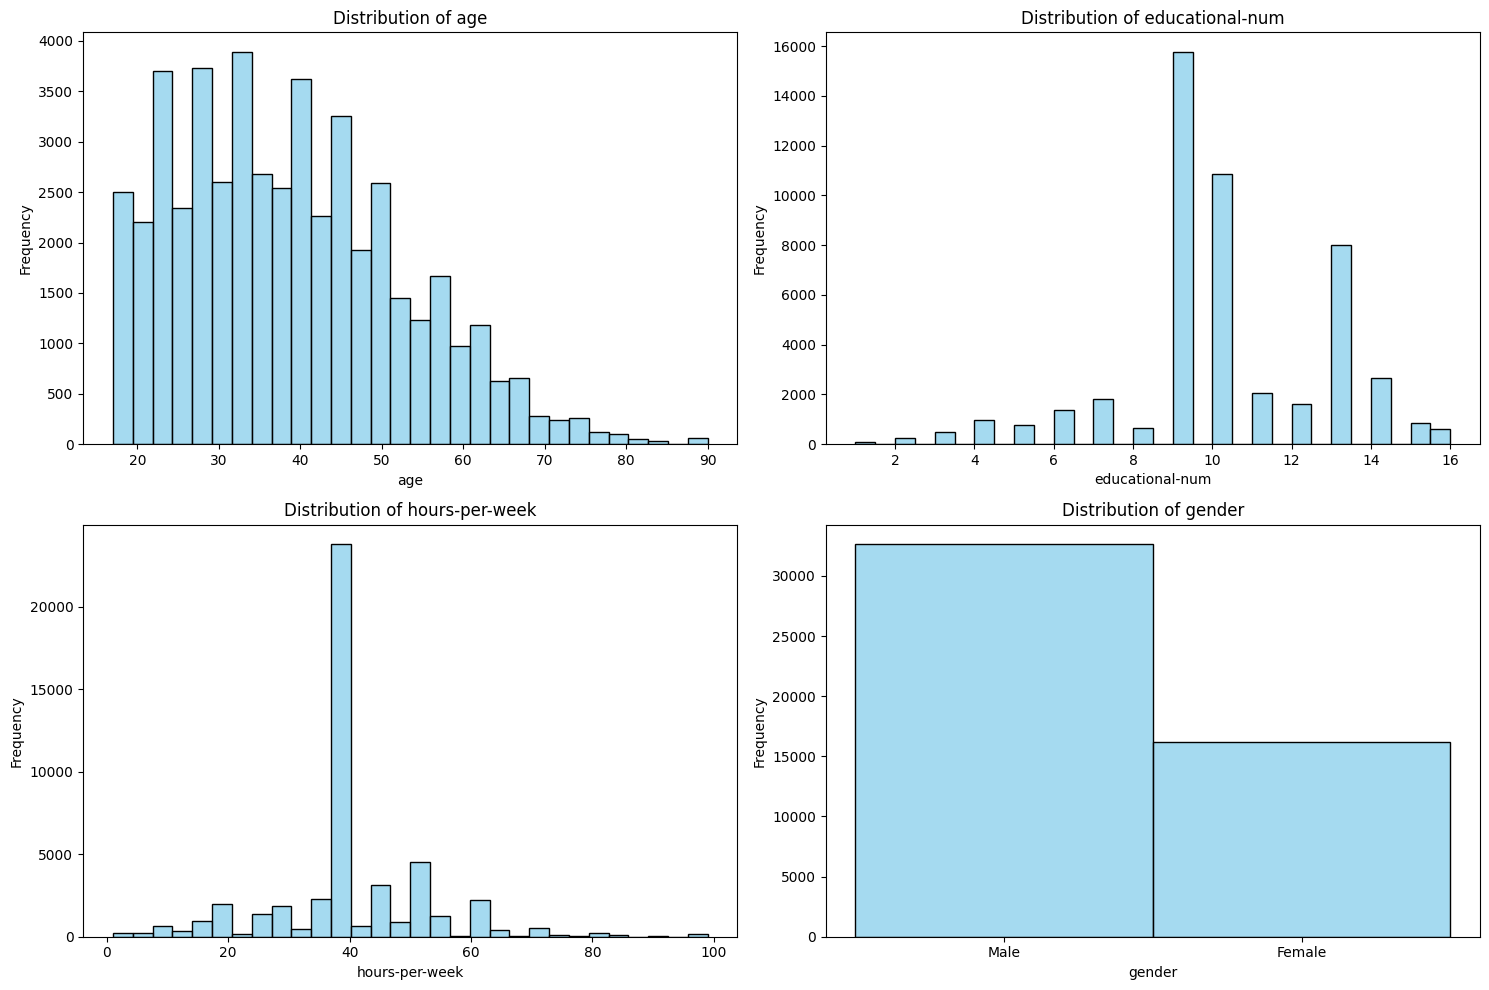

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select important features and the target variable for visualization
important_features = ['age', 'educational-num', 'hours-per-week',"gender"]

# Set up the plotting area
plt.figure(figsize=(15, 10))

# Plot distributions of important features
for i, feature in enumerate(important_features, start=1):  # Exclude 'income' for distribution plots
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=False, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout and display plots
plt.tight_layout()
plt.show()


<ipython-input-12-92841e9bd4bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=df, palette='Set2')


Text(0, 0.5, 'Count')

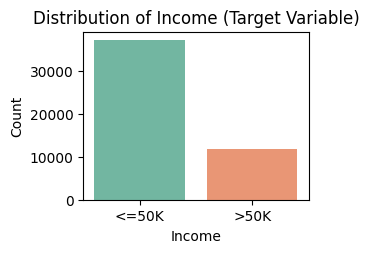

In [12]:
#Plot the target variable (categorical bar plot)
plt.subplot(2, 2, 4)
sns.countplot(x='income', data=df, palette='Set2')
plt.title('Distribution of Income (Target Variable)')
plt.xlabel('Income')
plt.ylabel('Count')


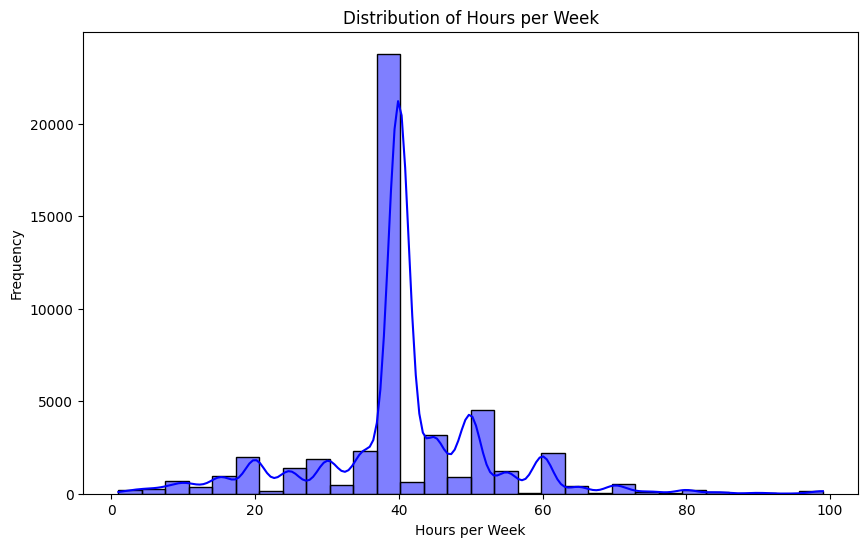

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the 'hours-per-week' column
plt.figure(figsize=(10, 6))

# Histogram and KDE plot
sns.histplot(df['hours-per-week'], kde=True, bins=30, color='blue')

# Add titles and labels
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')

# Show the plot
plt.show()

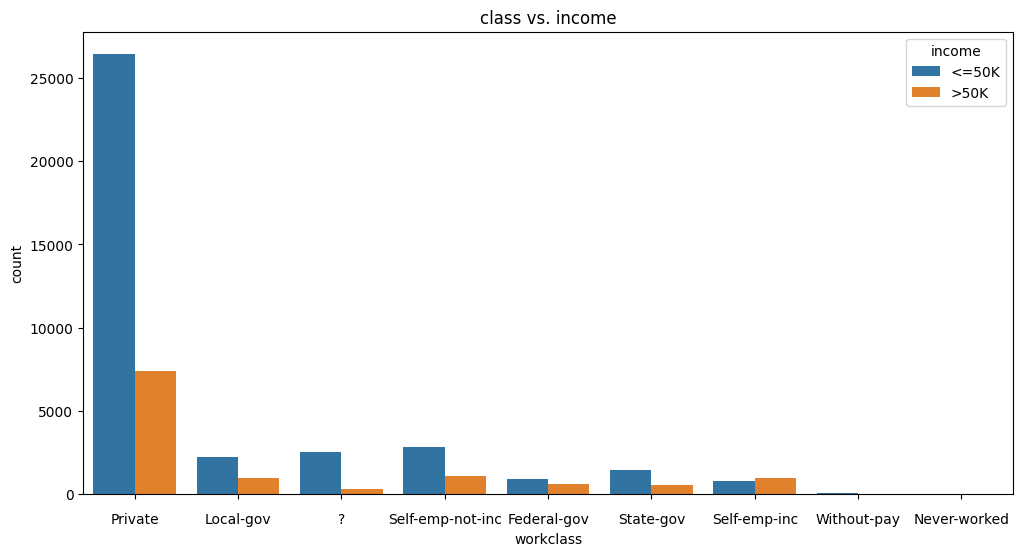

In [46]:
plt.figure(figsize=(12, 6))   #workclass feature is still important to the income
sns.countplot(data=df, x='workclass', hue='income')
plt.title("class vs. income")
plt.gca().tick_params(axis='x', labelsize=10, pad=10)
plt.show()

In [47]:
#dealing with not actual nan values
# Count "?" in each column

missing_counts = (df == "?").sum(axis=0)
print("\n number of '?' in each column:")
print(missing_counts)

# the total missing values
total_count = missing_counts.sum()
print(f"\nTotal number of '?' in the DataFrame: {total_count}")


 number of '?' in each column:
age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

Total number of '?' in the DataFrame: 6456


In [10]:
df= df.replace({"?": np.nan} )

In [11]:
#the precentege of missing values for each column
for column in df.columns:
    missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

age                0.000000
workclass          5.728633
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.749129
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754458
income             0.000000
dtype: float64


In [12]:
df["workclass"].value_counts()

,count
workclass,
Private,33860
Self-emp-not-inc,3861
Local-gov,3136
State-gov,1981
Self-emp-inc,1694
Federal-gov,1432
Without-pay,21
Never-worked,10


In [13]:
df["workclass"].mode()

,workclass
0,Private


In [14]:
#filll the missing values
workclass_mode =df["workclass"].mode()[0]
df["workclass"] = df["workclass"].fillna(workclass_mode)

df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2805
relationship,0
race,0
gender,0


In [15]:
#more concise way to fill the missing values with the mode (categorical features)

null_columns = df.select_dtypes(include=["object"]).columns
for col in null_columns:
    col_mode = df[col].mode()[0]
    df[col] = df[col].fillna(col_mode)

In [16]:
df.isnull().any()

,0
age,False
workclass,False
fnlwgt,False
education,False
educational-num,False
marital-status,False
occupation,False
relationship,False
race,False
gender,False


In [55]:
#done with filling the missing data

In [56]:
#Feature Engineering:

In [17]:
#what does fnlwgt represents?
df1 = df.drop('fnlwgt', axis=1)

In [18]:
#create a new feature like net-capital
df1['net-capital'] = df['capital-gain'] - df['capital-loss']

In [19]:
#creat age bins to limit the effect of outliers
bins = [0, 25, 40, 60, 100]
labels = ['young', 'middle-aged', 'senior', 'elderly']
df1['age-group'] = pd.cut(df['age'], bins=bins, labels=labels)

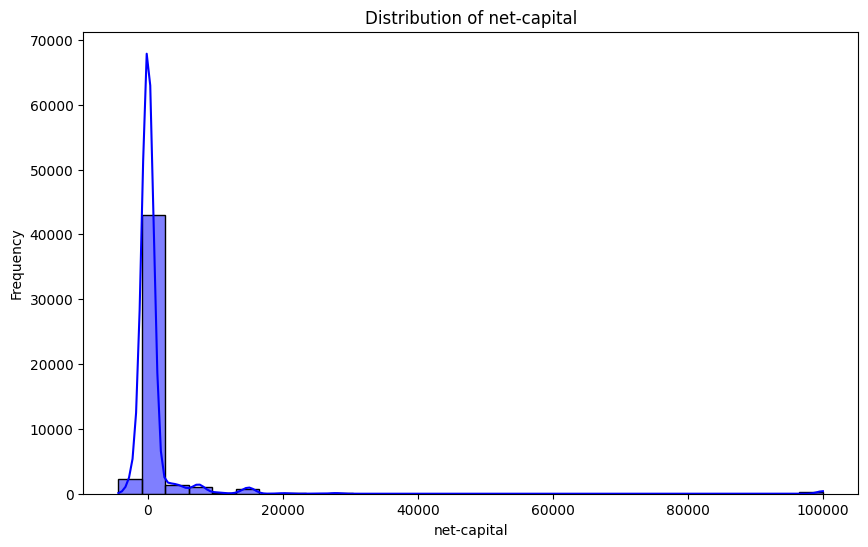

In [20]:
# Visualize the distribution of the 'net-capital' column

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Histogram and KDE plot
sns.histplot(df1["net-capital"], kde=True, bins=30, color='blue')

# Add titles and labels
plt.title('Distribution of net-capital')
plt.xlabel('net-capital')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [21]:
#find the outliers
df1.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week,net-capital
count,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,10.078807,1080.217688,87.595573,40.425886,992.622115
std,13.708493,2.570046,7455.905921,403.209129,12.392729,7479.462491
min,17.000000,1.000000,0.000000,0.000000,1.000000,-4356.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,99999.000000


In [22]:
#a simple way to understaand the outliers:

Q1 = df["capital-gain"].quantile(0.25)  # 25th percentile
Q3 = df["capital-gain"].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1                           # Interquartile Range

outliers_iqr = (df["capital-gain"] < (Q1 - 1.5 * IQR)) | (df["capital-gain"] > (Q3 + 1.5 * IQR))

# print(f"Outliers in {column}:")
print(outliers_iqr.sum())

4035


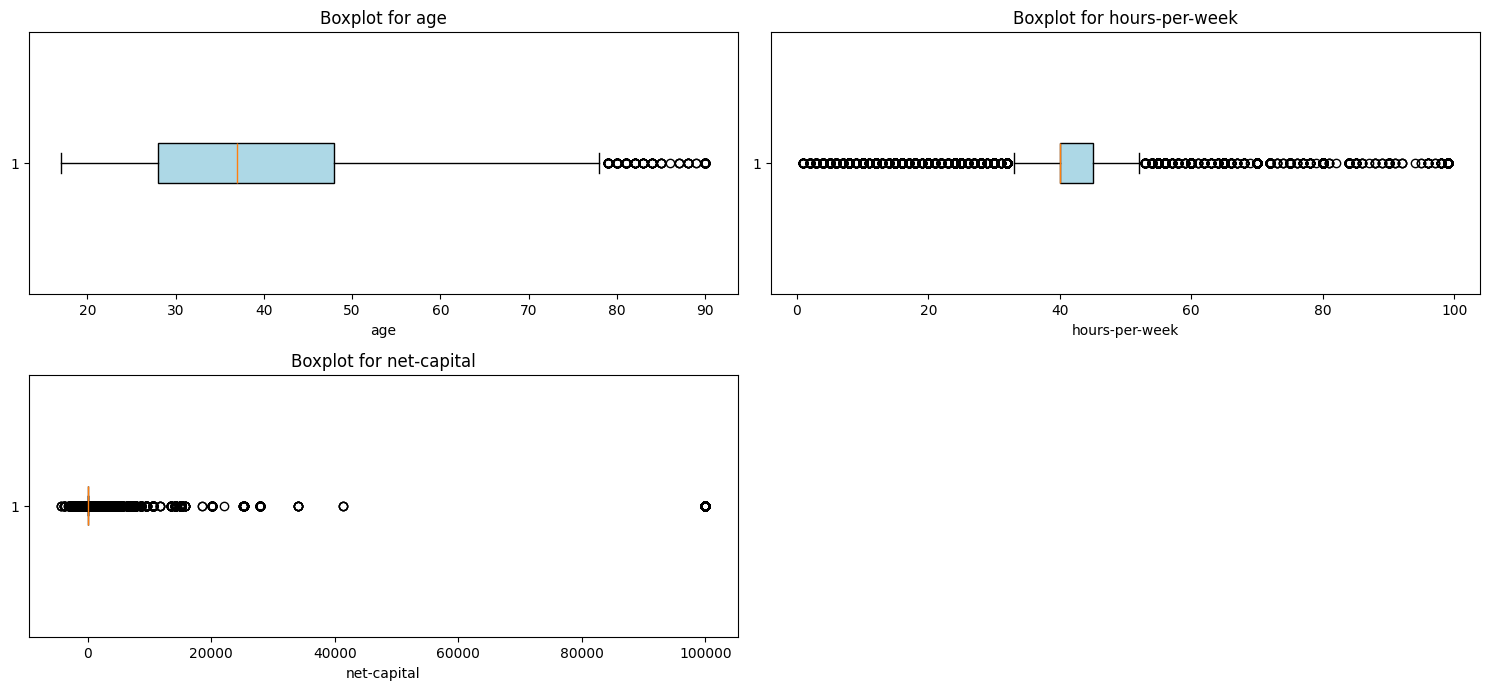

In [23]:
import matplotlib.pyplot as plt

# List of numerical columns to visualize
numerical_columns = ['age', # 'capital-gain', 'capital-loss',
                     'hours-per-week','net-capital']

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))  # Adjust figure size
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(3, 2, i)  # Create a 3x2 grid of subplots
    plt.boxplot(df1[col], vert=False, patch_artist=True,
                boxprops=dict(facecolor="lightblue"))  # Boxplot customization
    plt.title(f'Boxplot for {col}')  # Add title
    plt.xlabel(col)  # Add x-axis label

plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Display the plots


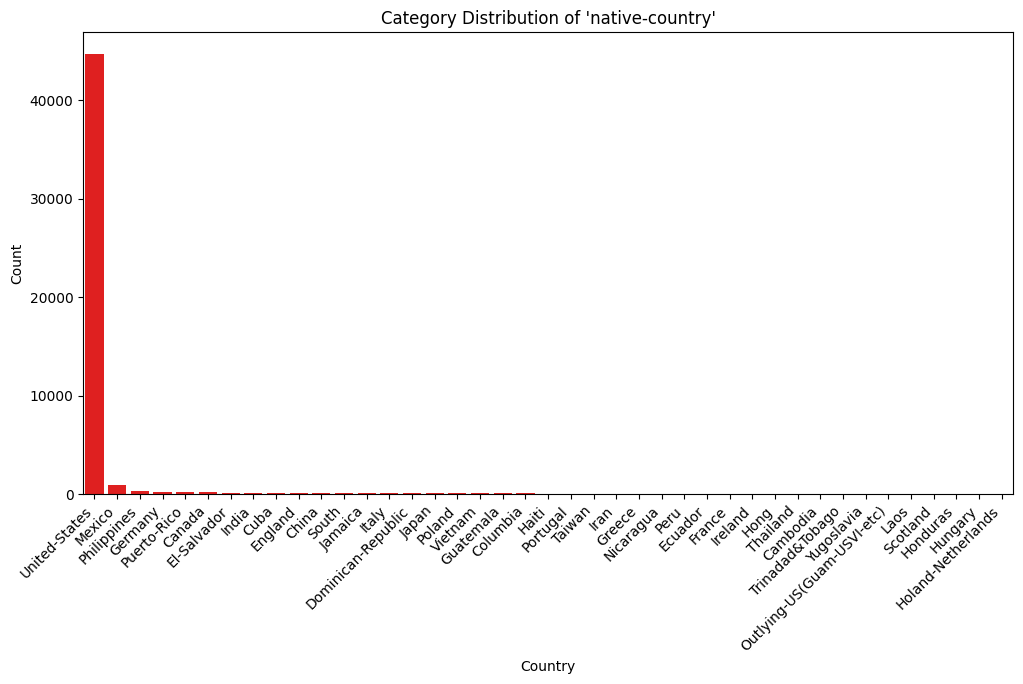

In [24]:
#dealing with rare categories
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot to visualize category distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='native-country', order=df['native-country'].value_counts().index, color="red")
plt.xticks(rotation=45, ha='right')
plt.title("Category Distribution of 'native-country'")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [25]:
# Check rare frequency distribution of a categorical feature
category_counts = df['native-country'].value_counts()

# Define a threshold for rarity (e.g., categories with less than 1% of the total)
threshold = 0.01 * len(df)
rare_categories = category_counts[category_counts < threshold].index.tolist()

print("Rare Categories:", rare_categories)
print(threshold)

Rare Categories: ['Philippines', 'Germany', 'Puerto-Rico', 'Canada', 'El-Salvador', 'India', 'Cuba', 'England', 'China', 'South', 'Jamaica', 'Italy', 'Dominican-Republic', 'Japan', 'Poland', 'Vietnam', 'Guatemala', 'Columbia', 'Haiti', 'Portugal', 'Taiwan', 'Iran', 'Greece', 'Nicaragua', 'Peru', 'Ecuador', 'France', 'Ireland', 'Hong', 'Thailand', 'Cambodia', 'Trinadad&Tobago', 'Yugoslavia', 'Outlying-US(Guam-USVI-etc)', 'Laos', 'Scotland', 'Honduras', 'Hungary', 'Holand-Netherlands']
487.90000000000003


In [26]:
# group rare categories
df1['native-country'] = df['native-country'].replace(rare_categories, 'Other')

In [27]:
df1.head(20)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,net-capital,age-group
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,young
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,middle-aged
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,middle-aged
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,7688,senior
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K,0,young
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0,middle-aged
6,29,Private,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K,0,middle-aged
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,3103,elderly
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K,0,young
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K,0,senior


\\?\C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


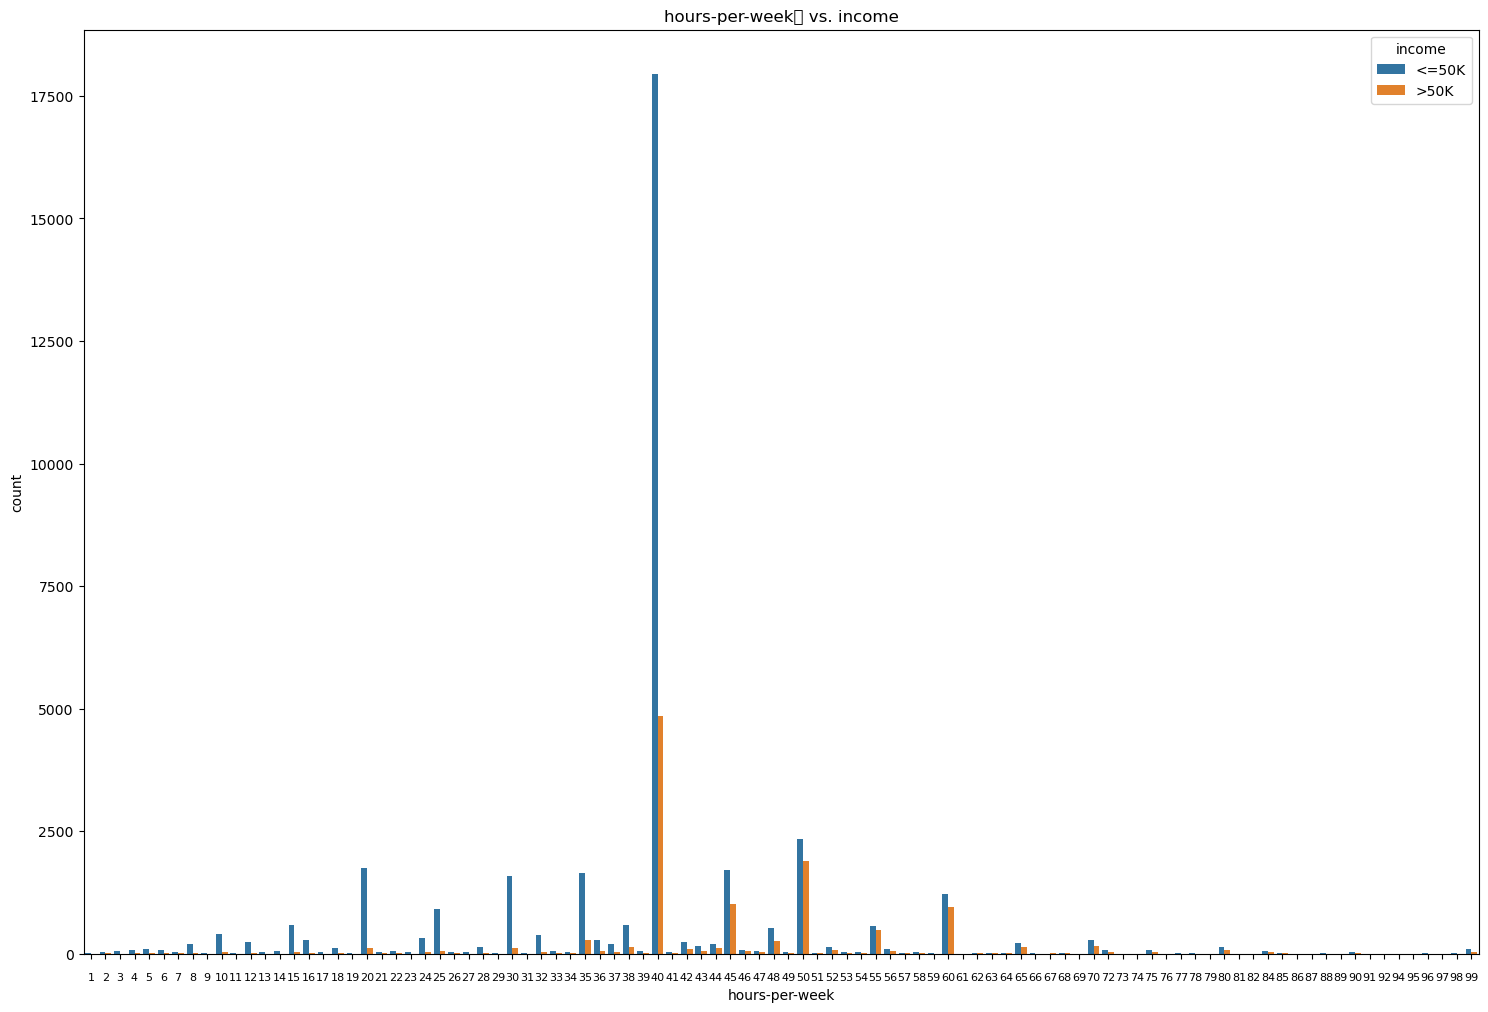

In [ ]:
plt.figure(figsize=(18, 12))   #the outliers in hours-per-week is irrelevent to the the target variable income,
                               #"extreme working values doesn't correlate with high income", thus it's safe to cap the outliers.
sns.countplot(data=df, x='hours-per-week', hue='income')
plt.title("hours-per-week	 vs. income")
plt.gca().tick_params(axis='x', labelsize=8, pad=10)
plt.show()

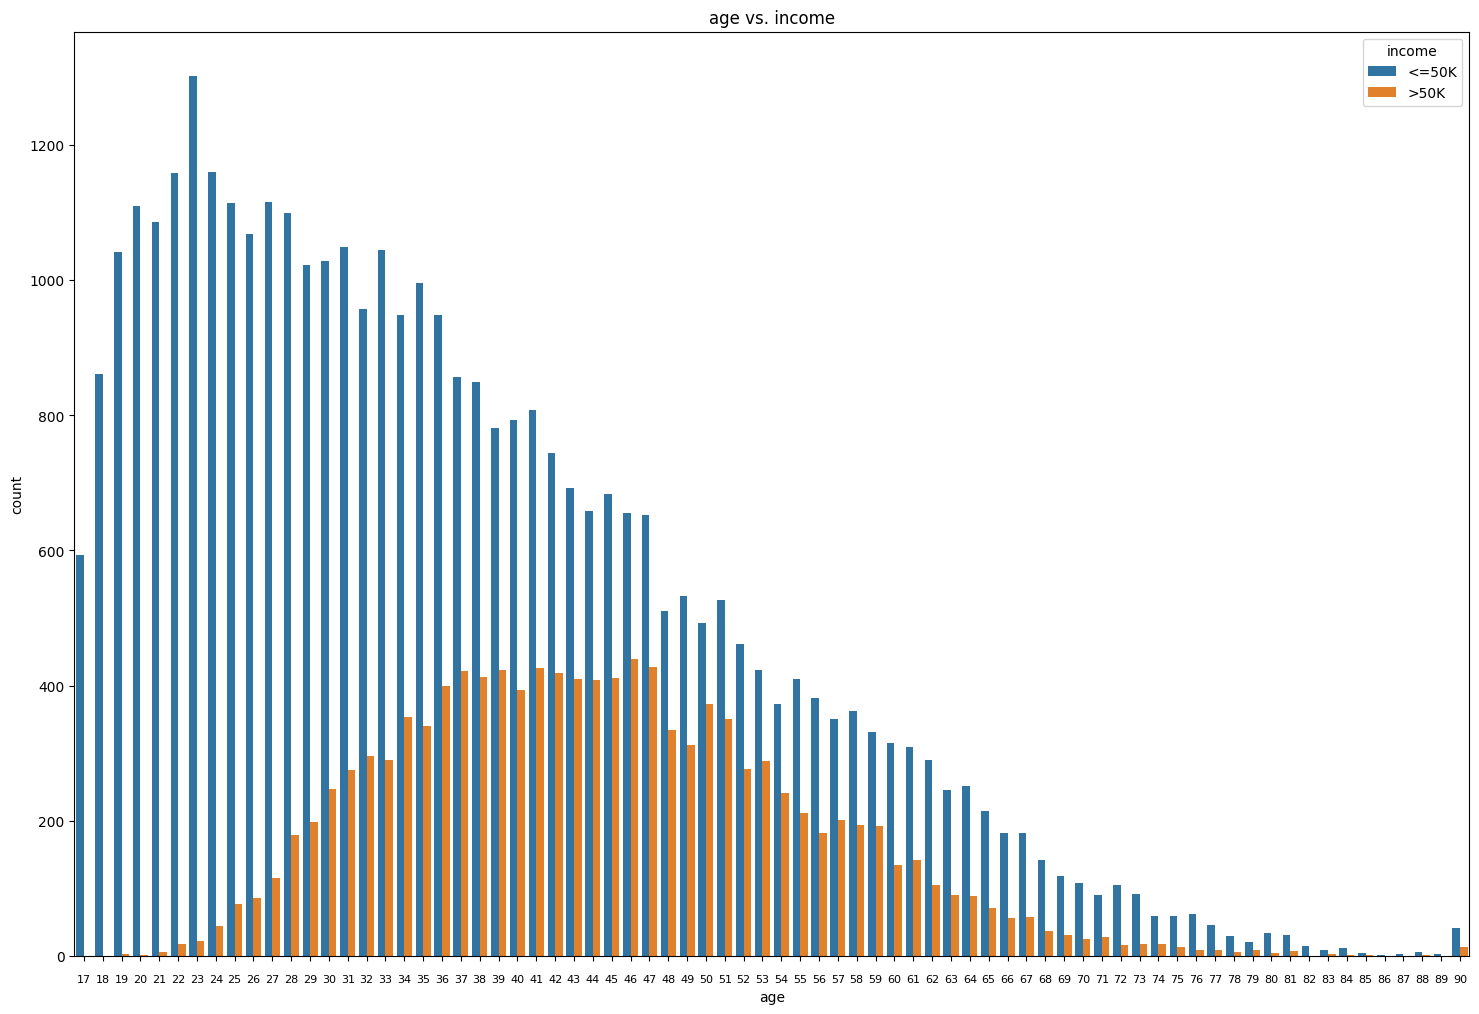

In [72]:
#visualize the corelation between age and income
plt.figure(figsize=(18, 12))
sns.countplot(data=df, x='age', hue='income')
plt.title("age vs. income")
plt.gca().tick_params(axis='x', labelsize=8, pad=10)
plt.show()

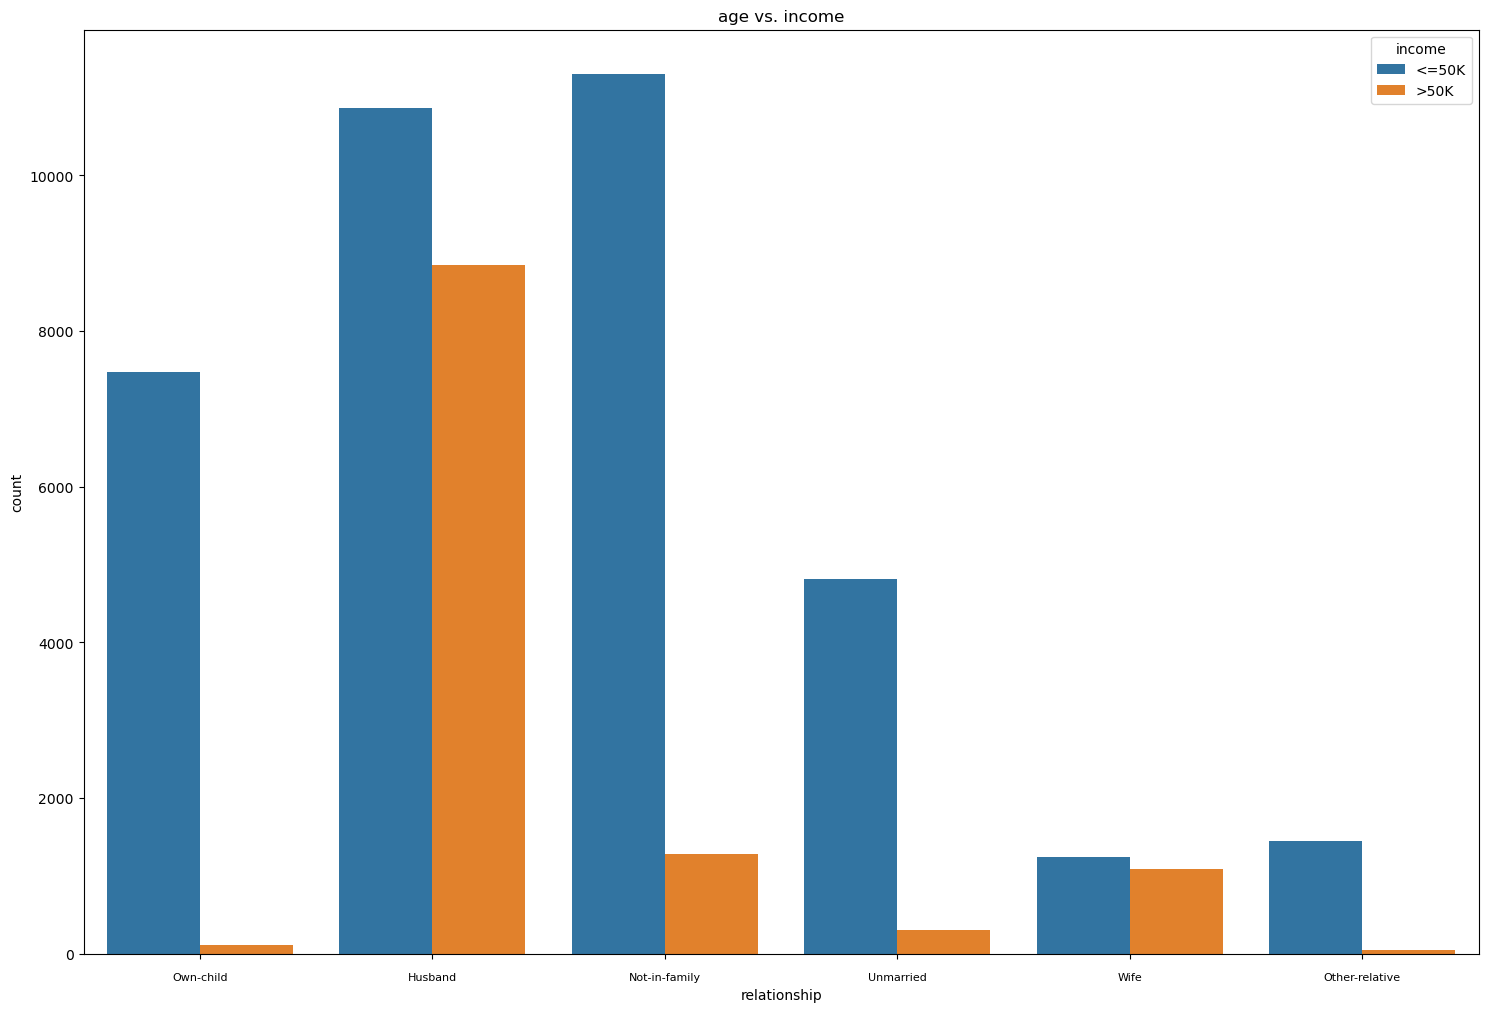

In [ ]:
#visualize the corelation between relationship and income

plt.figure(figsize=(18, 12))
sns.countplot(data=df, x='relationship', hue='income')
plt.title("age vs. income")
plt.gca().tick_params(axis='x', labelsize=8, pad=10)
plt.show()

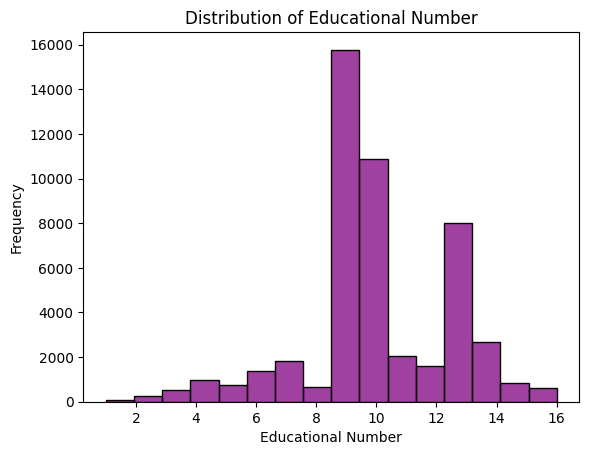

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['educational-num'], bins=16, kde=False , color='purple')
plt.title("Distribution of Educational Number")
plt.xlabel("Educational Number")
plt.ylabel("Frequency")
plt.show()

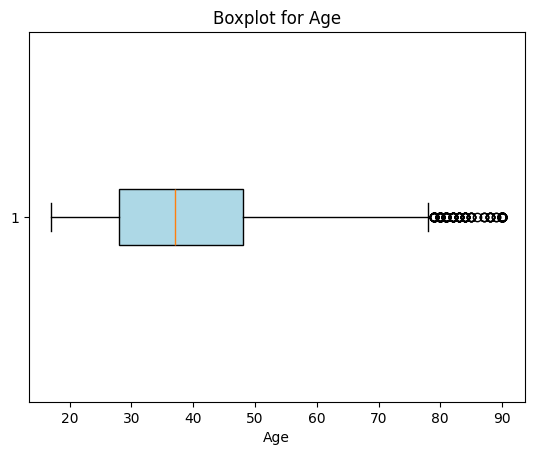

In [77]:
#otliers in "age" column is already handeled by creating grouping pins.
import matplotlib.pyplot as plt
plt.boxplot(df1['age'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Boxplot for Age')
plt.xlabel('Age')
plt.show()

In [28]:
#capping outliers:  is replacing them with a defined maximum or minimum value


# Function to cap outliers in a column at the 5th and 95th percentiles
def cap_outliers(column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = column.quantile(lower_percentile)
    upper_bound = column.quantile(upper_percentile)
    return column.clip(lower=lower_bound, upper=upper_bound)

numerical_columns = ['hours-per-week','net-capital']  # apply capping to all numerical columns

for col in numerical_columns:          # Cap outliers in each numerical column
    df1[col] = cap_outliers(df1[col])

df1[numerical_columns].describe()   # to verify that outliers are capped



,hours-per-week,net-capital
count,48790.000000,48790.000000
mean,40.258352,350.573745
std,10.214374,1216.838742
min,18.000000,0.000000
25%,40.000000,0.000000
50%,40.000000,0.000000
75%,45.000000,0.000000
max,60.000000,5013.000000


In [ ]:
#one hot encoded

In [29]:
df['race'].value_counts()

,count
race,
White,41714
Black,4683
Asian-Pac-Islander,1517
Amer-Indian-Eskimo,470
Other,406


In [80]:
df['gender'].value_counts()

,count
gender,
Male,32614
Female,16176


In [81]:
df1['native-country'].value_counts()

,count
native-country,
United-States,44648
Other,3199
Mexico,943


In [83]:
df["relationship"].value_counts()

,count
relationship,
Husband,19703
Not-in-family,12557
Own-child,7569
Unmarried,5124
Wife,2331
Other-relative,1506


In [178]:
df1.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,net-capital,age-group
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,young
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,middle-aged
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,middle-aged
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,5013,senior
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K,0,young


In [188]:
print(df1.dtypes)

age                   int64
workclass            object
education            object
educational-num       int64
marital-status       object
occupation           object
relationship         object
race                 object
gender               object
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country       object
income               object
net-capital           int64
age-group          category
dtype: object


In [30]:
#one hot encoded df2:

df2 = pd.get_dummies(df1, columns=['workclass', 'education', 'occupation',"gender","race",
                                   "age-group","native-country","relationship","marital-status"], drop_first=True)
#label encoding for the income
df2['income_encoded'] = df1['income'].apply(lambda x: 1 if x == '>50K' else 0)


print(df2.dtypes)




age                                     int64
educational-num                         int64
capital-gain                            int64
capital-loss                            int64
hours-per-week                          int64
                                        ...  
marital-status_Married-spouse-absent     bool
marital-status_Never-married             bool
marital-status_Separated                 bool
marital-status_Widowed                   bool
income_encoded                          int64
Length: 64, dtype: object


In [31]:
pd.set_option('display.max_columns', None)  # This will show all columns

df2.head()


,age,educational-num,capital-gain,capital-loss,hours-per-week,income,net-capital,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,gender_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White,age-group_middle-aged,age-group_senior,age-group_elderly,native-country_Other,native-country_United-States,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,income_encoded
0,25,7,0,0,40,<=50K,0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,0
1,38,9,0,0,50,<=50K,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,0
2,28,12,0,0,40,>50K,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,1
3,44,10,7688,0,40,>50K,5013,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,1
4,18,10,0,0,30,<=50K,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,0


In [32]:
# Drop non-numeric columns before computing correlation dff drop
dff = df2.drop(columns=["income","age","capital-gain","capital-loss"])

pd.set_option('display.max_rows', None)
# Compute correlation matrix
correlation_matrix = dff.corr()

# Get absolute correlation with the target variable and sort
feature_importance = correlation_matrix["income_encoded"].abs().sort_values(ascending=False)
print("Features sorted by importance to target:\n", feature_importance)


Features sorted by importance to target:
 income_encoded                          1.000000
marital-status_Married-civ-spouse       0.445663
educational-num                         0.332802
marital-status_Never-married            0.318512
net-capital                             0.317887
hours-per-week                          0.252328
age-group_senior                        0.228816
relationship_Own-child                  0.225688
gender_Male                             0.214639
occupation_Exec-managerial              0.210818
relationship_Not-in-family              0.190100
education_Bachelors                     0.180537
education_Masters                       0.174256
occupation_Other-service                0.155324
education_Prof-school                   0.154641
relationship_Unmarried                  0.143781
workclass_Self-emp-inc                  0.139691
education_HS-grad                       0.130890
education_Doctorate                     0.126483
workclass_Private          

In [33]:
pip install mrmr-selection

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.2 MB/s eta 0:00:00


In [34]:
from mrmr import mrmr_classif
df2 = df2.drop(columns=["age","capital-gain","capital-loss","income"]) #all these columns were changed to grouping bins or label encoding...
X = df2.drop(columns=["income_encoded"])
y = df2["income_encoded"]


In [35]:
df2 = df2.astype(int)
#transform the data type because deep learning, Tensor don't support object type bool.

In [36]:
df2.head()

,educational-num,hours-per-week,net-capital,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,gender_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White,age-group_middle-aged,age-group_senior,age-group_elderly,native-country_Other,native-country_United-States,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,income_encoded
0,7,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
1,9,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,12,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,10,40,5013,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,10,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [37]:
df2.shape

(48790, 60)

In [38]:
mrmr_classif(X=X, y=y, K=25)

100%|██████████| 25/25 [00:04<00:00,  6.15it/s]


['marital-status_Married-civ-spouse',
 'education_HS-grad',
 'net-capital',
 'educational-num',
 'age-group_senior',
 'hours-per-week',
 'marital-status_Never-married',
 'occupation_Exec-managerial',
 'gender_Male',
 'education_Prof-school',
 'relationship_Not-in-family',
 'education_Masters',
 'education_Doctorate',
 'relationship_Own-child',
 'education_Bachelors',
 'workclass_Self-emp-inc',
 'occupation_Other-service',
 'relationship_Unmarried',
 'relationship_Wife',
 'workclass_Private',
 'race_White',
 'relationship_Other-relative',
 'occupation_Prof-specialty',
 'occupation_Handlers-cleaners',
 'education_11th']

In [39]:
X = df2[['marital-status_Married-civ-spouse',
 'education_HS-grad',
 'net-capital',
 'educational-num',
 'age-group_senior',
 'hours-per-week',
 'marital-status_Never-married',
 'occupation_Exec-managerial',
 'gender_Male',
 'education_Prof-school',
 'relationship_Not-in-family',
 'education_Doctorate',
 'education_Masters',
 'relationship_Own-child',
 'education_Bachelors',
 'workclass_Self-emp-inc',
 'occupation_Other-service',
 'relationship_Unmarried',
 'relationship_Wife',
 'workclass_Private',
 'race_White',
 'relationship_Other-relative',
 'occupation_Prof-specialty',
 'occupation_Handlers-cleaners',
 'education_11th']]
y = df2['income_encoded']

In [40]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [41]:
from sklearn.model_selection import train_test_split

# first split: 70% training, 30% temporary (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42,shuffle=True)

# second split: Split the temporary set into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42,shuffle=True)

# Print the sizes of each set to confirm
print(f"Training set: {X_train.shape[0]} rows")
print(f"Validation set: {X_val.shape[0]} rows")
print(f"Test set: {X_test.shape[0]} rows")



Training set: 34153 rows
Validation set: 7318 rows
Test set: 7319 rows


In [42]:
#firstly random forest:  with no undersample

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_temp)


# print(f"Training set: {X_temp.shape[0]} rows")
# print(f"Training set: {y_temp.shape[0]} rows") #just to check the number of rows


accuracy = accuracy_score(preds, y_temp)
precision = precision_score(preds, y_temp)
recall = recall_score(preds, y_temp)
f1 = f1_score(preds, y_temp)
auc = roc_auc_score(preds, y_temp)

# print(f"Training set: {y_temp.shape[0]} rows")
# print(f"Training set: {preds.shape[0]} rows")



In [43]:
print("randomforest model metrics:\n") #before undersample
print(f"acuracy: {accuracy_score(y_temp, preds):.2f}" )
print(f"recall: {recall_score(y_temp, preds):.2f}")
print(f"precision: {precision_score(y_temp, preds):.2f}")
print(f"F1-score: {f1:.2f}")
preds_proba = rf_model.predict_proba(X_temp)[:, 1]
auc = roc_auc_score(y_temp, preds_proba)
print(f"AUC-ROC: {auc:.2f}")

randomforest model metrics:

acuracy: 0.84
recall: 0.58
precision: 0.70
F1-score: 0.63
AUC-ROC: 0.88


In [44]:
#the randomforest model after undersampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

undersample = RandomUnderSampler()
X_under, y_under = undersample.fit_resample(X_train, y_train)
print(f"original dataset distribution---> { Counter(y)}")
print(f"after undersampling---> {Counter(y_under)}")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.7, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)




original dataset distribution---> Counter({0: 37109, 1: 11681})
after undersampling---> Counter({0: 8138, 1: 8138})


In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_temp)

accuracy = accuracy_score(preds, y_temp)
precision = precision_score(preds, y_temp)
recall = recall_score(preds, y_temp)
f1 = f1_score(preds, y_temp)
auc = roc_auc_score(preds, y_temp)


print(f"acuracy: {accuracy_score(y_temp,preds):.2f}" )
print(f"recall: {recall_score(y_temp,preds):.2f}")
print(f"precision: {precision_score(y_temp,preds):.2f}")
print(f"F1-score: {f1:.2f}")
preds_proba = rf_model.predict_proba(X_temp)[:, 1]
auc = roc_auc_score(y_temp, preds_proba)
print(f"AUC-ROC: {auc:.2f}")

#---------------------------------------after undersample

#random forest model has slightly better f1 score after undersampling with lower precision and accuracy score.

acuracy: 0.77
recall: 0.84
precision: 0.51
F1-score: 0.64
AUC-ROC: 0.87


In [46]:
#scaling with logistic regression model

from sklearn.preprocessing import MinMaxScaler , StandardScaler

scaler_stander = StandardScaler().set_output(transform="pandas")

X_train_scaler = scaler_stander.fit_transform(X_train)
X_temp_scaler = scaler_stander.transform(X_temp)

In [47]:
#secondly: LogisticRegression with standerscaler
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train_scaler, y_train)

preds = logreg.predict(X_temp_scaler)

accuracy = accuracy_score(preds, y_temp)
precision = precision_score(preds, y_temp)
recall = recall_score(preds, y_temp)
f1 = f1_score(preds, y_temp)
auc = roc_auc_score(preds, y_temp)


In [48]:
print("logistic regression model metrics with standard scaling:\n")
print(f"acuracy: {accuracy_score(y_temp,preds):.2f}" )
print(f"recall: {recall_score(y_temp,preds):.2f}")
print(f"precision: {precision_score(y_temp,preds):.2f}")
print(f"F1-score: {f1:.2f}")
preds_proba = logreg.predict_proba(X_temp)[:, 1]
auc = roc_auc_score(y_temp, preds_proba)
print(f"AUC-ROC: {auc:.2f}")

# before scaling :
# acuracy: 0.85
# recall: 0.56
# precision: 0.72
# F1-score: 0.63
# AUC-ROC: 0.89

# with minmax_scaler
# acuracy: 0.80
# recall: 0.86
# precision: 0.54
# F1-score: 0.67
# AUC-ROC: 0.50

logistic regression model metrics with standard scaling:

acuracy: 0.79
recall: 0.86
precision: 0.55
F1-score: 0.67
AUC-ROC: 0.79


In [49]:
#finally:combine randomforest and logistic regression together

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_temp)

# Logistic Regression metrics
logreg_accuracy = accuracy_score(y_temp, logreg_preds)
logreg_precision = precision_score(y_temp, logreg_preds)
logreg_recall = recall_score(y_temp, logreg_preds)
logreg_f1 = f1_score(y_temp, logreg_preds)
# logreg_auc = roc_auc_score(y_temp, logreg_preds)

preds_proba = logreg.predict_proba(X_temp)[:, 1]
logreg_auc = roc_auc_score(y_temp, preds_proba)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_temp)

# Random Forest metrics
rf_accuracy = accuracy_score(y_temp, rf_preds)
rf_precision = precision_score(y_temp, rf_preds)
rf_recall = recall_score(y_temp, rf_preds)
rf_f1 = f1_score(y_temp, rf_preds)
rf_preds_proba = rf_model.predict_proba(X_temp)[:, 1]
rf_auc = roc_auc_score(y_temp, rf_preds_proba)

# Store metrics in a dictionary
metrics_dict = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [logreg_accuracy, rf_accuracy],
    'Recall': [logreg_recall, rf_recall],
    'Precision': [logreg_precision, rf_precision],
    'F1-score': [logreg_f1, rf_f1],
    'AUC-ROC': [logreg_auc, rf_auc]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Display the combined DataFrame
metrics_df


,Model,Accuracy,Recall,Precision,F1-score,AUC-ROC
0,Logistic Regression,0.774954,0.861981,0.521249,0.649649,0.884856
1,Random Forest,0.768122,0.840813,0.512825,0.637083,0.871722


In [50]:
#another way
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to evaluate a model and return metrics
def evaluate_model(name, model, X, y):
    preds = model.predict(X)
    preds_proba = model.predict_proba(X)[:, 1]  # Probability predictions for AUC-ROC
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y, preds),
        "Precision": precision_score(y, preds),
        "Recall": recall_score(y, preds),
        "F1-Score": f1_score(y, preds),
        "AUC-ROC": roc_auc_score(y, preds_proba),
    }
    return metrics

# Evaluate Random Forest
rf_metrics = evaluate_model("Random Forest", rf_model, X_temp, y_temp)
rf_model.fit(X_train , y_train)

# Evaluate Logistic Regression
logreg_metrics = evaluate_model("Logistic Regression", logreg, X_temp, y_temp)
logreg.fit(X_train, y_train)

# Combine metrics into a DataFrame
metrics_df = pd.DataFrame([rf_metrics, logreg_metrics,])

# Display the DataFrame
metrics_df



,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Random Forest,0.768122,0.512825,0.840813,0.637083,0.871722
1,Logistic Regression,0.774954,0.521249,0.861981,0.649649,0.884856


In [51]:
##deep learning

In [52]:

# we will train validation dataset

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from kerastuner.tuners import Hyperband

In [53]:
# the previous data split
# from sklearn.model_selection import train_test_split

# # First split: 70% training, 30% temporary (validation + test)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# # Second split: Split the temporary set into validation (15%) and test (15%)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [54]:
model = Sequential()
model.add(Dense(units=32, activation='relu',input_dim=len(X_train.columns)))
# model.add(Dropout(0.2))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

In [55]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
print(X_train.dtypes)
print(y_train.dtypes)

marital-status_Married-civ-spouse    int64
education_HS-grad                    int64
net-capital                          int64
educational-num                      int64
age-group_senior                     int64
hours-per-week                       int64
marital-status_Never-married         int64
occupation_Exec-managerial           int64
gender_Male                          int64
education_Prof-school                int64
relationship_Not-in-family           int64
education_Doctorate                  int64
education_Masters                    int64
relationship_Own-child               int64
education_Bachelors                  int64
workclass_Self-emp-inc               int64
occupation_Other-service             int64
relationship_Unmarried               int64
relationship_Wife                    int64
workclass_Private                    int64
race_White                           int64
relationship_Other-relative          int64
occupation_Prof-specialty            int64
occupation_

In [76]:
model.fit(
    X_train,    #validation set will only take a subset of X_temp, and won't train the validation set
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=2,
    shuffle= True
)


Epoch 1/50
153/153 - 1s - 5ms/step - accuracy: 0.8208 - loss: 0.4788 - val_accuracy: 0.8078 - val_loss: 0.4793
Epoch 2/50
153/153 - 1s - 5ms/step - accuracy: 0.8066 - loss: 0.5511 - val_accuracy: 0.8085 - val_loss: 0.4040
Epoch 3/50
153/153 - 1s - 8ms/step - accuracy: 0.8189 - loss: 0.4349 - val_accuracy: 0.7934 - val_loss: 0.4780
Epoch 4/50
153/153 - 1s - 7ms/step - accuracy: 0.8134 - loss: 0.5546 - val_accuracy: 0.7595 - val_loss: 0.5086
Epoch 5/50
153/153 - 1s - 5ms/step - accuracy: 0.8189 - loss: 0.4595 - val_accuracy: 0.8125 - val_loss: 0.4892
Epoch 6/50
153/153 - 1s - 3ms/step - accuracy: 0.8148 - loss: 0.5234 - val_accuracy: 0.7207 - val_loss: 0.6793
Epoch 7/50
153/153 - 1s - 4ms/step - accuracy: 0.8075 - loss: 0.6245 - val_accuracy: 0.8122 - val_loss: 0.4042
Epoch 8/50
153/153 - 1s - 4ms/step - accuracy: 0.8120 - loss: 0.4913 - val_accuracy: 0.8095 - val_loss: 0.4634
Epoch 9/50
153/153 - 0s - 3ms/step - accuracy: 0.8214 - loss: 0.4616 - val_accuracy: 0.8148 - val_loss: 0.3992
E

In [79]:
y_pred = model.predict(X_test)

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [78]:
for i in y_pred:
  print(i)

Streaming output truncated to the last 5000 lines.
[0.00471475]
[0.6245018]
[0.34591553]
[0.2827695]
[0.46856672]
[0.9197499]
[0.5127228]
[0.6136052]
[0.00867764]
[0.5826201]
[0.55670214]
[0.9466035]
[0.711327]
[0.9981569]
[0.00473655]
[0.91711503]
[0.00411142]
[0.27854618]
[0.5916897]
[0.8751248]
[0.9988074]
[0.5984225]
[0.9466035]
[0.6196255]
[0.11138865]
[0.8080189]
[0.9458473]
[0.20422913]
[0.00747123]
[0.00052588]
[0.05008499]
[0.9459553]
[0.9358708]
[0.5127229]
[0.60018855]
[0.93050057]
[0.59510964]
[0.88676655]
[0.5639738]
[0.68832886]
[0.10266097]
[0.28665015]
[0.9144909]
[0.66844857]
[0.9987501]
[0.16352412]
[0.9074623]
[0.61662346]
[0.99563354]
[0.00046559]
[0.14948954]
[0.8751248]
[0.06598673]
[0.6142489]
[0.24871527]
[0.00339076]
[0.6267119]
[0.16794564]
[0.8747036]
[0.6322972]
[0.5826201]
[0.17018443]
[0.73589337]
[0.84274167]
[0.5285561]
[0.6245018]
[0.6142489]
[0.8630762]
[0.6345828]
[0.8905857]
[0.58728516]
[0.19507791]
[0.15411422]
[0.09331513]
[0.998401]
[0.83548427]


In [80]:
y_pred = [0 if val < 0.5 else 1 for val in y_pred]


In [81]:
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
auc = roc_auc_score(y_pred, y_test)


In [82]:
print("model metrics:\n")
print(f"acuracy: {accuracy:.2f}" )
print(f"recall: {recall:.2f}")
print(f"precision: {precision:.2f}")
print(f"F1-score: {f1:.2f}")
y_hat_proba = rf_model.predict_proba(X_temp)[:, 1]
auc = roc_auc_score(y_temp, y_hat_proba)
print(f"AUC-ROC: {auc:.2f}")

model metrics:

acuracy: 0.80
recall: 0.76
precision: 0.90
F1-score: 0.82
AUC-ROC: 0.87


In [83]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8016 - loss: 0.4456


In [84]:
#cofusion marix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import itertools
import matplotlib.pyplot as plt


In [70]:
cm= confusion_matrix(y_true=y_test,y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["<=50",">50"])

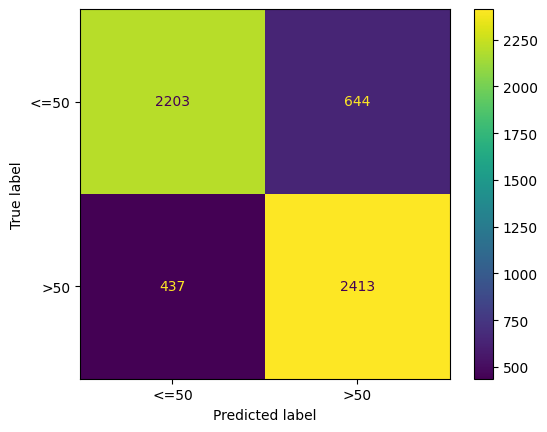

In [75]:
cm_display.plot()
plt.show()

In [ ]:
# TP , FN
# FP , TN

In [72]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [73]:
from kerastuner.tuners import Hyperband

In [74]:
# apply hyperparameter tunning
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import Hyperband

# Define the model-building function for Keras-Tuner
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=128, step=32), activation='relu', input_dim=X_train.shape[1]))

    # Tune the number of hidden layers
    for i in range(hp.Int('num_hidden_layers', min_value=1, max_value=3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32), activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Tune the learning rate
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    model.compile(optimizer="sgd",  #Adam(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize the Keras-Tuner
tuner = Hyperband(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_epochs=20,            # Maximum number of epochs
    factor=3,                 # Reduction factor for hyperband
    directory='tuner_logs',   # Directory to save logs
    project_name='nn_optimization'
)

# Run the search
tuner.search(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"Best number of hidden layers: {best_hps.get('num_hidden_layers')}")
for i in range(best_hps.get('num_hidden_layers')):
    print(f"  Hidden layer {i+1} units: {best_hps.get(f'units_{i}')}, dropout: {best_hps.get(f'dropout_{i}')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")

# Build the best model and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Trial 30 Complete [00h 00m 22s]
val_accuracy: 0.7217833995819092

Best val_accuracy So Far: 0.7869054079055786
Total elapsed time: 00h 04m 27s
Best number of hidden layers: 1
  Hidden layer 1 units: 32, dropout: 0.0
Learning rate: 0.0013812005903276895
Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5442 - loss: 74.2889 - val_accuracy: 0.4936 - val_loss: 0.7028
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5517 - loss: 0.6926 - val_accuracy: 0.5947 - val_loss: 0.6898
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5836 - loss: 0.6875 - val_accuracy: 0.6767 - val_loss: 0.6878
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5929 - loss: 0.6852 - val_accuracy: 0.4938 - val_loss: 0.7037
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5998 - loss: 0.6828 - val_accuracy: 0.5924 - val_loss: 0.6908
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6350 - loss: 0.6799 - val_accuracy: 0.52

In [86]:
#model after tunning
tuned_model = Sequential()
tuned_model.add(Dense(units=32, activation='relu',input_dim=len(X_train.columns)))
tuned_model.add(Dropout(0.2))

tuned_model.add(Dense(units=1,activation='sigmoid')) #because the target feature is binary classificaion

In [88]:
tuned_model.compile(optimizer=Adam(learning_rate=0.00138), loss='binary_crossentropy', metrics=['accuracy'])

In [89]:
tuned_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=2,
    shuffle= True
)


Epoch 1/50
153/153 - 3s - 20ms/step - accuracy: 0.6133 - loss: 11.1941 - val_accuracy: 0.7423 - val_loss: 3.4772
Epoch 2/50
153/153 - 2s - 12ms/step - accuracy: 0.7274 - loss: 9.2649 - val_accuracy: 0.7679 - val_loss: 3.9860
Epoch 3/50
153/153 - 1s - 8ms/step - accuracy: 0.7687 - loss: 6.9724 - val_accuracy: 0.7888 - val_loss: 3.5102
Epoch 4/50
153/153 - 1s - 7ms/step - accuracy: 0.7710 - loss: 6.1147 - val_accuracy: 0.7876 - val_loss: 2.9867
Epoch 5/50
153/153 - 1s - 5ms/step - accuracy: 0.7823 - loss: 3.5515 - val_accuracy: 0.7906 - val_loss: 1.3785
Epoch 6/50
153/153 - 1s - 4ms/step - accuracy: 0.7755 - loss: 2.9651 - val_accuracy: 0.7881 - val_loss: 1.3342
Epoch 7/50
153/153 - 1s - 4ms/step - accuracy: 0.7829 - loss: 1.7323 - val_accuracy: 0.7957 - val_loss: 0.8588
Epoch 8/50
153/153 - 1s - 3ms/step - accuracy: 0.7857 - loss: 1.2252 - val_accuracy: 0.7857 - val_loss: 1.0270
Epoch 9/50
153/153 - 1s - 4ms/step - accuracy: 0.7841 - loss: 0.8496 - val_accuracy: 0.8027 - val_loss: 0.465

In [90]:
y_pred = model.predict(X_test)

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [91]:
y_pred = [0 if val < 0.5 else 1 for val in y_pred]


In [92]:
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
auc = roc_auc_score(y_pred, y_test)

In [97]:
print("model metrics after tunning:\n")
print(f"acuracy: {accuracy:.3f}" )
print(f"recall: {recall:.3f}")
print(f"precision: {precision:.3f}")
print(f"F1-score: {f1:.3f}")
y_hat_proba = rf_model.predict_proba(X_temp)[:, 1]
auc = roc_auc_score(y_temp, y_hat_proba)
print(f"AUC-ROC: {auc:.3f}")

#before tunning:
# acuracy: 0.85
# recall: 0.78
# precision: 0.50
# F1-score: 0.61
# AUC-ROC: 0.89

model metrics after tunning:

acuracy: 0.805
recall: 0.758
precision: 0.896
F1-score: 0.821
AUC-ROC: 0.872


In [95]:
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Random Forest,0.768122,0.512825,0.840813,0.637083,0.871722
1,Logistic Regression,0.774954,0.521249,0.861981,0.649649,0.884856


In [98]:
import pandas as pd

# Before tuning metrics
before_tuning_metrics = {
    "Model": "Neural Network (Before Tuning)",
    "Accuracy": 0.805,
    "Recall": 0.78,
    "Precision": 0.50,
    "F1-Score": 0.61,
    "AUC-ROC": 0.89
}

# After tuning metrics
after_tuning_metrics = {
    "Model": "Neural Network (After Tuning)",
    "Accuracy": 0.80,
    "Recall": 0.758,
    "Precision": 0.896,
    "F1-Score": 0.821,
    "AUC-ROC": 0.872
}

# Combine both into a DataFrame
metrics_df1 = pd.DataFrame([before_tuning_metrics, after_tuning_metrics])

# Display the combined DataFrame
metrics_df1


,Model,Accuracy,Recall,Precision,F1-Score,AUC-ROC
0,Neural Network (Before Tuning),0.805,0.780,0.500,0.610,0.890
1,Neural Network (After Tuning),0.800,0.758,0.896,0.821,0.872


In [109]:
cm= confusion_matrix(y_true=y_test,y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["<=50",">50"])

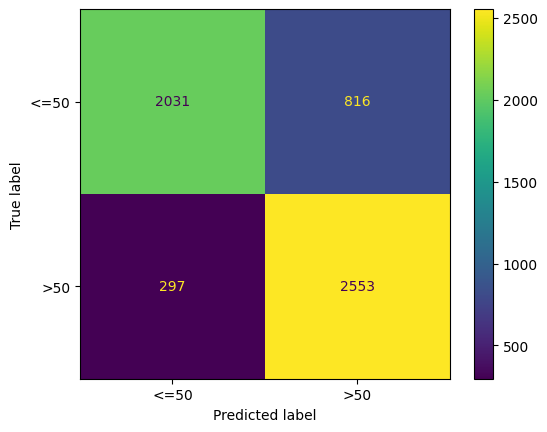

In [110]:
cm_display.plot()
plt.show()

In [ ]:
# TP , FN
# FP , TN

In [99]:
table = pd.concat([metrics_df, metrics_df1])

table

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Random Forest,0.768122,0.512825,0.840813,0.637083,0.871722
1,Logistic Regression,0.774954,0.521249,0.861981,0.649649,0.884856
0,Neural Network (Before Tuning),0.805000,0.500000,0.780000,0.610000,0.890000
1,Neural Network (After Tuning),0.800000,0.896000,0.758000,0.821000,0.872000


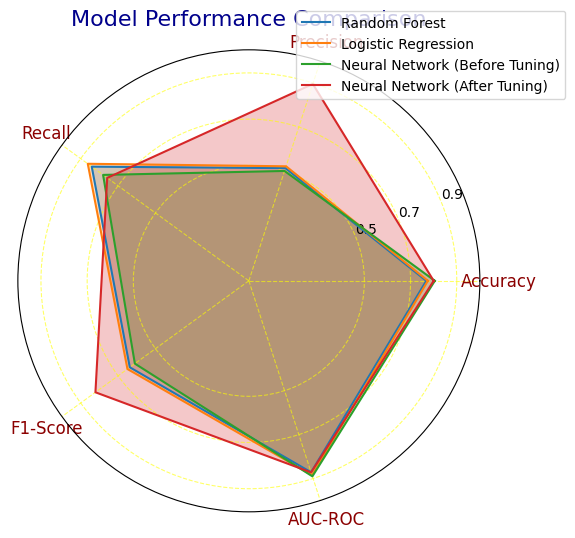

In [117]:
# Metrics and angles for the radar chart
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the chart

# Create radar chart
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

# Plot each model's metrics
for i, row in table.iterrows():
    values = row[metrics].tolist() + row[metrics].tolist()[:1]
    ax.plot(angles, values, label=row["Model"])
    ax.fill(angles, values, alpha=0.25)

# Customizing the chart
ax.set_title("Model Performance Comparison", size=16, color="darkblue")
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=12, color="darkred")
ax.set_yticks([0.5, 0.7, 0.9])
ax.set_yticklabels(["0.5", "0.7", "0.9"], color="black")
ax.set_ylim(0, 1)
ax.grid(True, linestyle='--', color='yellow', alpha=0.6)

# Add legend
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

plt.show()


Model Metrics Evaluation

Random forest and logistic regression has high recall score and good AUC-ROC show it identifies positive cases well and has strong discriminatory power.but it has low precision (0.51) indicates many false positives,suggest poor handling of false positives.

The neural network(before tunning) is simillar to the previous two models with even lower Recall and Precision.

The neural network (after tuning) provides the best balance with strong precision and F1-Score, making it the most effective model overall.but we can use random forest model if we care about recall, when missing positive cases is costly or critical to ensures fewer false negatives (missed positive cases).


In [100]:
#another way
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='tuner_logs',
    project_name='nn_optimization'
)


Reloading Tuner from tuner_logs/nn_optimization/tuner0.json


In [101]:
tuner.search(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32)


In [102]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


In [103]:
print(f"Best number of hidden layers: {best_hps.get('num_hidden_layers')}")
for i in range(best_hps.get('num_hidden_layers')):
    print(f"  Hidden layer {i+1} units: {best_hps.get(f'units_{i}')}, dropout: {best_hps.get(f'dropout_{i}')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")


Best number of hidden layers: 1
  Hidden layer 1 units: 32, dropout: 0.0
Learning rate: 0.0013812005903276895


In [104]:
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)


Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5269 - loss: 9.2670 - val_accuracy: 0.5889 - val_loss: 0.6638
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5690 - loss: 0.6640 - val_accuracy: 0.5540 - val_loss: 0.6579
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6500 - loss: 0.6536 - val_accuracy: 0.6819 - val_loss: 0.6325
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6760 - loss: 0.6443 - val_accuracy: 0.6514 - val_loss: 0.6307
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6794 - loss: 0.6266 - val_accuracy: 0.6609 - val_loss: 0.6162
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6829 - loss: 0.6248 - val_accuracy: 0.6482 - val_loss: 0.6400
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.6203 - val_accuracy: 0.6293 - val_loss: 0.6562
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7214 - loss: 0.6112 - val_accuracy: 0

In [105]:
y_pred = model.predict(X_test)

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [106]:
y_pred = [0 if val < 0.5 else 1 for val in y_pred]


In [107]:
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
auc = roc_auc_score(y_pred, y_test)

In [108]:
print("model metrics after tunning:\n")
print(f"acuracy: {accuracy:.3f}" )
print(f"recall: {recall:.3f}")
print(f"precision: {precision:.3f}")
print(f"F1-score: {f1:.3f}")
y_hat_proba = rf_model.predict_proba(X_temp)[:, 1]
auc = roc_auc_score(y_temp, y_hat_proba)
print(f"AUC-ROC: {auc:.3f}")

#before tunning:
# acuracy: 0.85
# recall: 0.78
# precision: 0.50
# F1-score: 0.61
# AUC-ROC: 0.89

model metrics after tunning:

acuracy: 0.805
recall: 0.758
precision: 0.896
F1-score: 0.821
AUC-ROC: 0.872
